## Reading files from the folder

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
source_files=[i for i in os.listdir('./Sales_data')]
paths=["Sales_data/"+i for i in source_files]

<IPython.core.display.Javascript object>

In [3]:
df=pd.DataFrame()
for i in paths[0:]:
    file=pd.read_csv(i)
    df=pd.concat([df, file])

In [4]:
df=df.replace(list(df.columns), np.NaN)
#replace works on data rows and not column names waali row

In [5]:
df=df.reset_index(drop=True)
#to reset and get a common unique index all through the dataframe

## Exploring the data

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### Observation:- All the records are in object datatype format. 
#### Atleast Quantity Ordered, Price Each should be in integer format and Order Date should be in Date type format

In [8]:
df.shape

(186850, 6)

In [9]:
rows=df.shape[0]

### 1. Missing values check 

In [10]:
df.isnull().sum()

Order ID            900
Product             900
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    900
dtype: int64

#### Observation:- 900 rows are missing any values for these columns(including those you have made, inherantly they were 545)

In [11]:
max_missing_elems=df.isnull().sum().values.max()
print(max_missing_elems, "is the maximum no of rows missing the data")
if max_missing_elems*100/rows<1:
    print(max_missing_elems, "is", max_missing_elems*100/rows, "% of total data")
    print("We can drop these rows")
else:
    print("We need to impute")

900 is the maximum no of rows missing the data
900 is 0.48166978860048165 % of total data
We can drop these rows


#### Assumption:- if the number of records that are missing are under 1% of the entire dataset, You can drop them

In [12]:
#Deleting the missing values
df=df.dropna()

#Checking if any missing values remain
df.isnull().sum()
#No

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [13]:
df=df.reset_index(drop=True)

In [14]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### 2. Checking all the variables' composition

#### 1. Order Id

In [15]:
orderid_names=df['Order ID'].value_counts().index
orderid_freq=df['Order ID'].value_counts().values
len(orderid_freq)
#Total Number of records

178437

In [16]:
dup_order_id=[]
for i, j in zip(range(len(orderid_names)), range(len(orderid_freq))):
    if orderid_freq[j]>1:
        dup_order_id.append(orderid_names[i])
len(dup_order_id)
#No of records having multiple items in the cart against same order ID

7136

#### Observation:- Total Number of records having multiple items in the cart against same order ID is 7136 out of 178437 i.e 4%

#### 2. Products

In [17]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [18]:
prod_vals=df['Product'].value_counts().values
prod_names=df['Product'].value_counts().index

In [19]:
len(df['Product'].value_counts())

19

#### Observation:- Clearly USB-C is the most selling product by volumes of those "19 products" that were sold

#### 3. Quantity & Price

In [20]:
df['Quantity Ordered']

0         2
1         1
2         1
3         1
4         1
         ..
185945    3
185946    1
185947    1
185948    1
185949    1
Name: Quantity Ordered, Length: 185950, dtype: object

In [21]:
df['Quantity Ordered_int']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each_int']=pd.to_numeric(df['Price Each'])
df['Revenue']= df['Quantity Ordered_int']*df['Price Each_int']
df.info()
#Price Each, Quantity have now been changed to int format with their new names. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Order ID              185950 non-null  object 
 1   Product               185950 non-null  object 
 2   Quantity Ordered      185950 non-null  object 
 3   Price Each            185950 non-null  object 
 4   Order Date            185950 non-null  object 
 5   Purchase Address      185950 non-null  object 
 6   Quantity Ordered_int  185950 non-null  int64  
 7   Price Each_int        185950 non-null  float64
 8   Revenue               185950 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 12.8+ MB


#### 4. Address

In [22]:
#df['location']=df['Purchase Address'].str.split(',').str[0]
#df['House_No']=df['location'].str.split().str[0]
df['House_No']=df['Purchase Address'].str.split(',').str[0].str.split().str[0]
df['Street']=df['Purchase Address'].str.split(',').str[0].str.split(" ",1).str[1]
df['City']=df['Purchase Address'].str.split(',').str[1]
#df['Other']=df['Purchase Address'].str.split(',').str[2]
#df['S_Code']=df['Other'].str.split().str[0]
df['S_Code']=df['Purchase Address'].str.split(',').str[2].str.split().str[0]
df['Zip']=df['Purchase Address'].str.split(',').str[2].str.split().str[1]

#### 5. Order Date

In [23]:
df['Order Date_dtf']=pd.to_datetime(df['Order Date'])
df['Order_year']=df['Order Date_dtf'].dt.year
df['Order_month']=df['Order Date_dtf'].dt.month
df['Order_day']=df['Order Date_dtf'].dt.day
df['Order_hour']=df['Order Date_dtf'].dt.hour
df['Order_minute']=df['Order Date_dtf'].dt.minute

### 3. Final Clean Database 

In [72]:
df=df[['Order ID', 'Product', 'Quantity Ordered_int','Price Each_int','Revenue','Order_day','Order_month', 'Order_year','Order_hour','Order_minute', 
       'House_No', 'Street', 'City', 'S_Code', 'Zip']]
df.head()

,Order ID,Product,Quantity Ordered_int,Price Each_int,Revenue,Order_day,Order_month,Order_year,Order_hour,Order_minute,House_No,Street,City,S_Code,Zip
0,176558,USB-C Charging Cable,2,11.95,23.90,19,4,2019,8,46,917,1st St,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,99.99,7,4,2019,22,30,682,Chestnut St,Boston,MA,02215
2,176560,Google Phone,1,600.00,600.00,12,4,2019,14,38,669,Spruce St,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,11.99,12,4,2019,14,38,669,Spruce St,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,11.99,30,4,2019,9,27,333,8th St,Los Angeles,CA,90001


## 4. Insights & Data Analysis

### 1. Analysing the Revenue by Year

In [73]:
df.groupby('Order_year')['Revenue'].sum()

Order_year
2019    3.448337e+07
2020    8.670290e+03
Name: Revenue, dtype: float64

#### Observation : 2020 has very low sales when compared to 2019

In [74]:
#df[df['Order_year']==2020]
for i in df['Order_year'].unique():
    print(i, len(df[df['Order_year']==i]))

2019 185916
2020 34


#### Observation : 2020 has very low number of transactions when compared to 2019

### 2. Analysing the Revenue by month

In [75]:
df.groupby('Order_month').sum()[['Quantity Ordered_int','Revenue']]

,Quantity Ordered_int,Revenue
Order_month,,
1,10903,1.822257e+06
2,13449,2.202022e+06
3,17005,2.807100e+06
4,20558,3.390670e+06
5,18667,3.152607e+06
6,15253,2.577802e+06
7,16072,2.647776e+06
8,13448,2.244468e+06
9,13109,2.097560e+06


In [76]:
r_df=df.groupby('Order_month').sum()['Revenue']
r_months=r_df.index
r_vals=r_df.values
print(r_df[r_vals==r_vals.max()].index[0],"th month has the highest sales at", r_vals.max(), "USD")

12 th month has the highest sales at 4613443.340001534 USD


#### Observation: December has the max sales overall

<IPython.core.display.Javascript object>

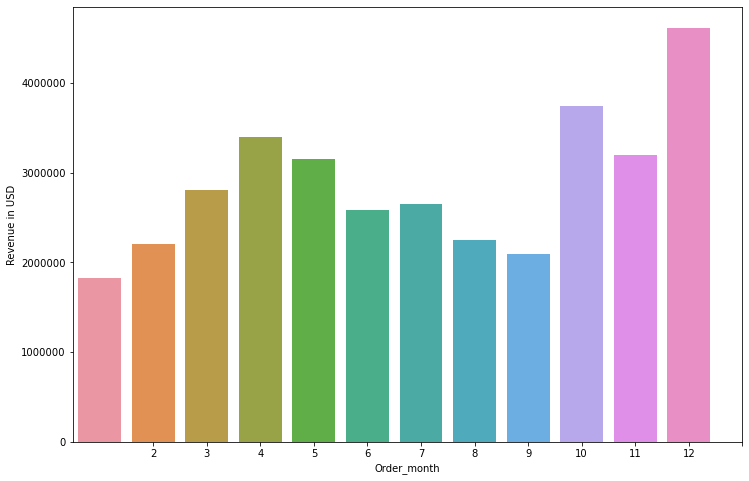

In [77]:
plt.figure(figsize=[12,8])
ax=sns.barplot(x=r_months, y=r_vals);
plt.xticks(r_months);
plt.ylabel("Revenue in USD")
plt.ticklabel_format(style='plain', axis='y') # Eliminates the scientific notation in the y axis 

### 3. Analysing the Revenue by City

In [78]:
df.groupby('City').sum()

,Quantity Ordered_int,Price Each_int,Revenue,Order_day,Order_month,Order_year,Order_hour,Order_minute
City,,,,,,,,
Atlanta,16602,2.779908e+06,2.795499e+06,234837,104794,30044739,214264,442932
Austin,11153,1.809874e+06,1.819582e+06,156782,69829,19998197,141946,289060
Boston,22528,3.637410e+06,3.661642e+06,312376,141112,40246750,288225,590442
Dallas,16730,2.752628e+06,2.767975e+06,234435,104620,29921582,214390,435155
Los Angeles,33289,5.421435e+06,5.452571e+06,469607,208325,59772496,427444,866638
New York City,27932,4.635371e+06,4.664317e+06,392706,175741,50224654,357696,733598
Portland,14053,2.307747e+06,2.320491e+06,197521,87765,25166837,179632,368389
San Francisco,50239,8.211462e+06,8.262204e+06,702669,315520,90313920,643265,1319477
Seattle,16553,2.733296e+06,2.747755e+06,229552,104941,29743909,213292,436368


In [79]:
city_names=df.groupby('City').sum()['Revenue'].index
city_sales=df.groupby('City').sum()['Revenue'].values
city_dict=dict(zip(city_names, city_sales))

In [80]:
city_with_highest_sales=max(city_dict, key=city_dict.get)
city_with_highest_sales

' San Francisco'

#### Observation: San Francisco drives the highest sales

In [81]:
top_5_cities=sorted(city_dict, key=city_dict.get, reverse=True)[:5]
top_5_cities

[' San Francisco', ' Los Angeles', ' New York City', ' Boston', ' Atlanta']

<IPython.core.display.Javascript object>

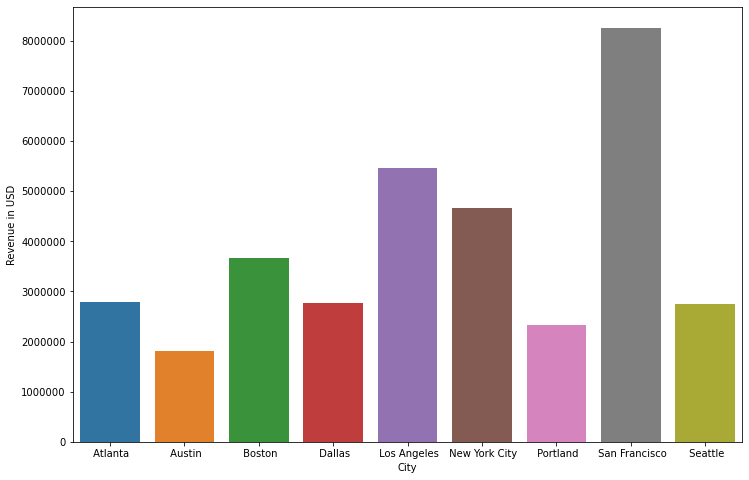

In [82]:
plt.figure(figsize=[12,8])
sns.barplot(x=city_names, y=city_sales);
plt.ylabel("Revenue in USD")
plt.ticklabel_format(style='plain', axis='y') # Eliminates the scientific notation in the y axis 

### 4. Analysing which product was sold the most

In [83]:
df.groupby('Product').sum()

,Quantity Ordered_int,Price Each_int,Revenue,Order_day,Order_month,Order_year,Order_hour,Order_minute
Product,,,,,,,,
20in Monitor,4129,451068.99,454148.71,64237,29336,8279921,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,97624,44440,12578371,90916,184331
27in FHD Monitor,7550,1125974.93,1132424.50,117702,52558,15156636,107540,219948
34in Ultrawide Monitor,6199,2348718.19,2355558.01,97726,43304,12479439,89076,183480
AA Batteries (4-pack),27635,79015.68,106118.40,325504,145558,41544963,298342,609039
AAA Batteries (4-pack),31017,61716.59,92740.83,326283,146370,41674182,297332,612113
Apple Airpods Headphones,15661,2332350.00,2349150.00,244828,109477,31393435,223304,455570
Bose SoundSport Headphones,13457,1332366.75,1345565.43,210543,94113,26903178,192445,392603
Flatscreen TV,4819,1440000.00,1445700.00,75959,34224,9691201,68815,142789


In [84]:
Product_qty=df.groupby('Product').sum()['Quantity Ordered_int'].values
Product_names=df.groupby('Product').sum()['Quantity Ordered_int'].index
prod_dict=dict(zip(Product_names, Product_qty))

In [85]:
highest_qty_sold_prod=sorted(prod_dict, key=prod_dict.get, reverse=True)[0]
highest_qty_sold_prod

'AAA Batteries (4-pack)'

#### Observation: AAA Batteries (4-pack) was the most sold product

In [86]:
#Top 5 products by Quanitty sold
sorted(prod_dict, key=prod_dict.get, reverse=True)[:5]

['AAA Batteries (4-pack)',
 'AA Batteries (4-pack)',
 'USB-C Charging Cable',
 'Lightning Charging Cable',
 'Wired Headphones']

In [87]:
# 5 cheapest products that are listed
prod_prices=df.groupby('Price Each_int').count().index
prods=[]
for i in sorted(prod_prices)[:5]:
    prods.append(df[df['Price Each_int']==i]['Product'].unique())
prods

[array(['AAA Batteries (4-pack)'], dtype=object),
 array(['AA Batteries (4-pack)'], dtype=object),
 array(['USB-C Charging Cable'], dtype=object),
 array(['Wired Headphones'], dtype=object),
 array(['Lightning Charging Cable'], dtype=object)]

#### Observation: The cheapest 5 products were also the products that were sold in most quantities

<IPython.core.display.Javascript object>

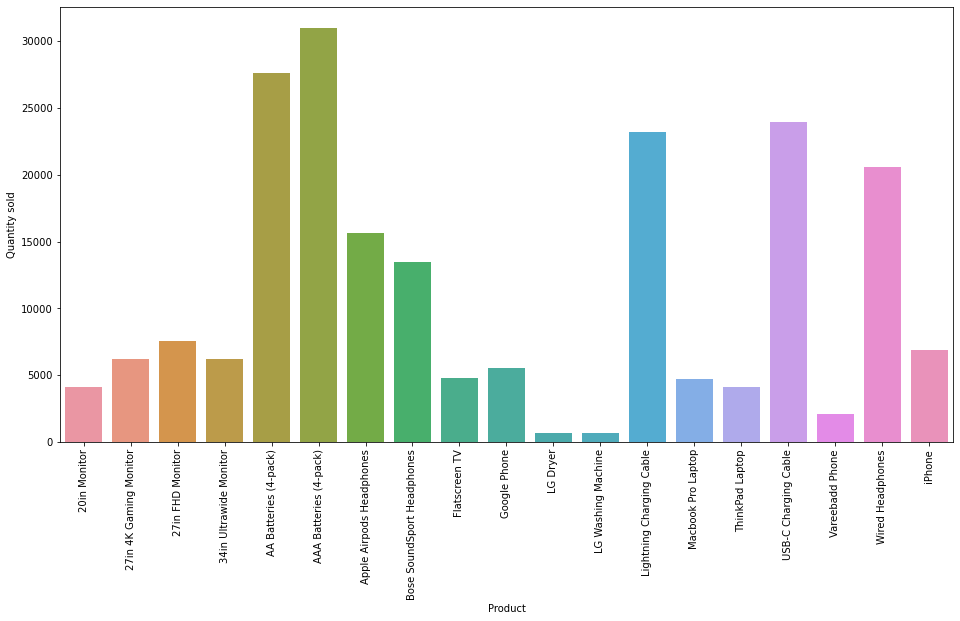

In [88]:
plt.figure(figsize=[16,8])
sns.barplot(x=Product_names, y=Product_qty);
plt.ylabel("Quantity sold")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90);# Eliminates the scientific notation in the y axis 

### 5. Analysing sales by time of the day

In [41]:
df.groupby('Order_hour').count()['Order ID']
df.groupby('Order_hour').count()['Order ID'].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Order_hour')

<IPython.core.display.Javascript object>

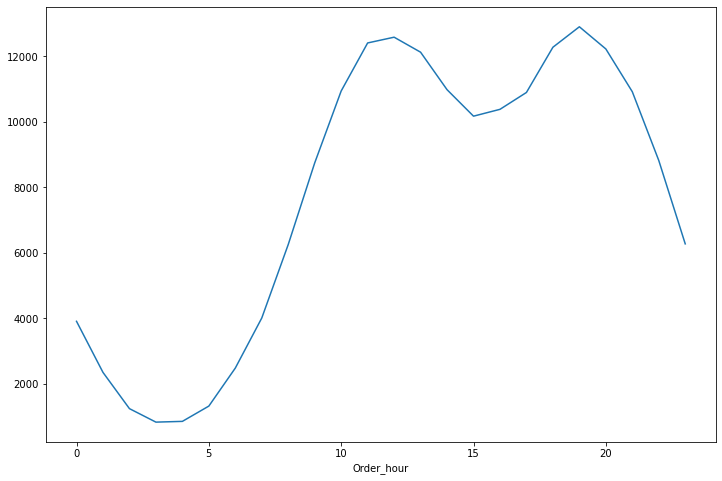

In [42]:
plt.figure(figsize=[12,8])
sns.lineplot(x=df.groupby('Order_hour').count()['Order ID'].index, y=df.groupby('Order_hour').count()['Order ID'].values);

In [43]:
time_dict=dict(zip(df.groupby('Order_hour').count()['Order ID'].index, df.groupby('Order_hour').count()['Order ID'].values))
sorted(time_dict, key=time_dict.get,reverse=True)[:2]

[19, 12]

#### Observation: 7 pm and around 12 pm are the best times with respect to the sales time. 

### 6. Comparing mean price with Quantity ordered

In [44]:
df.groupby('Product').mean()['Price Each_int'].values

array([ 109.99,  389.99,  149.99,  379.99,    3.84,    2.99,  150.  ,
         99.99,  300.  ,  600.  ,  600.  ,  600.  ,   14.95, 1700.  ,
        999.99,   11.95,  400.  ,   11.99,  700.  ])

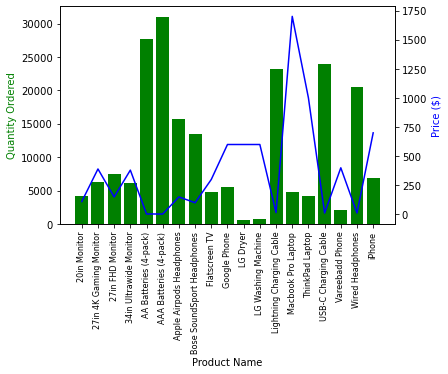

In [45]:
prices = df.groupby('Product').mean()['Price Each_int'].values

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Product_names, Product_qty, color='g')
ax2.plot(Product_names, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(Product_names, rotation='vertical', size=8);

In [46]:
df

,Order ID,Product,Quantity Ordered_int,Price Each_int,Revenue,Order_day,Order_month,Order_year,Order_hour,Order_minute,House_No,Street,City,S_Code,Zip
0,176558,USB-C Charging Cable,2,11.95,23.90,19,4,2019,8,46,917,1st St,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,99.99,7,4,2019,22,30,682,Chestnut St,Boston,MA,02215
2,176560,Google Phone,1,600.00,600.00,12,4,2019,14,38,669,Spruce St,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,11.99,12,4,2019,14,38,669,Spruce St,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,11.99,30,4,2019,9,27,333,8th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,8.97,17,9,2019,20,56,840,Highland St,Los Angeles,CA,90001
185946,259354,iPhone,1,700.00,700.00,1,9,2019,16,0,216,Dogwood St,San Francisco,CA,94016
185947,259355,iPhone,1,700.00,700.00,23,9,2019,7,39,220,12th St,San Francisco,CA,94016
185948,259356,34in Ultrawide Monitor,1,379.99,379.99,19,9,2019,17,30,511,Forest St,San Francisco,CA,94016


In [48]:
df.groupby('Order ID').sum()

,Quantity Ordered_int,Price Each_int,Revenue,Order_day,Order_month,Order_year,Order_hour,Order_minute
Order ID,,,,,,,,
141234,1,700.00,700.00,22,1,2019,21,25
141235,1,14.95,14.95,28,1,2019,14,15
141236,2,11.99,23.98,17,1,2019,13,33
141237,1,149.99,149.99,5,1,2019,20,33
141238,1,11.99,11.99,25,1,2019,11,59
...,...,...,...,...,...,...,...,...
319666,1,14.95,14.95,11,12,2019,20,58
319667,2,3.84,7.68,1,12,2019,12,1
319668,1,400.00,400.00,9,12,2019,6,43


In [49]:
185950-178437

7513

In [66]:
df=df[df['Quantity Ordered_int'].duplicated(keep=False)]

In [71]:
df_new=df.groupby('Quantity Ordered_int')['Product'].transform(lambda x: ','.join(x))

In [ ]:
df2=df[['Quantity Ordered_int', '']]

In [ ]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df_new = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()